In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d
import time

nside = 1024
lmax = 1024*3-1

def iqu2teb(IQU, nside, lmax=None):
    print('a')
    alms = hp.map2alm(IQU, lmax=lmax, pol=True)
    print('b')
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=False)

def teb2iqu(TEB, nside, lmax=None):
    alms = hp.map2alm(TEB, lmax=lmax, pol=False)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=True)

# Make a field with T_QU covariance, make a copy upgraded to 2048, compare the power spectra of both 

In [2]:
noise_diag = hp.read_map('map_noise_cov_des1024_QU.fits', field=(0,1))
noise_diag = np.concatenate([noise_diag[0],noise_diag[1]])

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


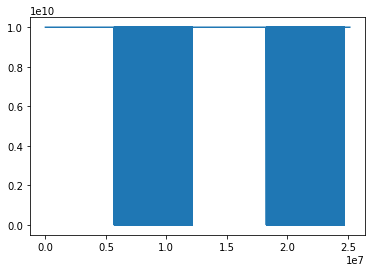

In [3]:
plt.plot(noise_diag[:])

In [4]:
tau = np.min(noise_diag)
print(tau)
T_pixel = np.ones(noise_diag.shape)*tau
noise_bar_diag = noise_diag - tau

0.00017164225573651493


In [5]:
random_T_field = np.hstack([np.random.normal(0., np.sqrt(tau), hp.nside2npix(nside)),
                            np.random.normal(0., np.sqrt(tau), hp.nside2npix(nside))])

In [6]:
random_T_field.shape

(25165824,)

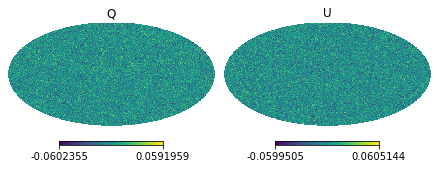

In [7]:
hp.mollview(random_T_field[:hp.nside2npix(nside)], sub=(1,2,1), title='Q')
hp.mollview(random_T_field[hp.nside2npix(nside):], sub=(1,2,2), title='U')

In [8]:
power_pol = hp.anafast([random_T_field[:hp.nside2npix(nside)]*0.,
                        random_T_field[:hp.nside2npix(nside)],
                        random_T_field[hp.nside2npix(nside):]],
                       lmax = nside*3-1, pol = True)

In [9]:
tau_ell = np.mean([power_pol[1][50:nside*2], power_pol[2][50:nside*2]]) 

In [10]:
tau_ell

1.714103885400195e-10

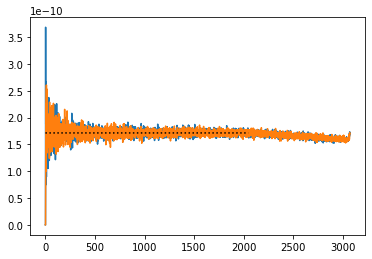

In [11]:
plt.plot(power_pol[1])
plt.plot(power_pol[2])
plt.plot([tau_ell]*nside*2, ':', c='black')

# Now with ud grade

In [12]:
random_T_field_2048 = hp.ud_grade(np.array([random_T_field[:hp.nside2npix(nside)]*0.,
                                            random_T_field[:hp.nside2npix(nside)],
                                            random_T_field[hp.nside2npix(nside):]]),
                                  2048)

In [13]:
random_T_field_2048

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.00721606,  0.00806576,  0.01423394, ..., -0.02957811,
        -0.02099643,  0.00213929],
       [ 0.01433068,  0.00018026, -0.0130434 , ..., -0.0105956 ,
         0.00025376, -0.03905036]])

In [14]:
power_pol_2048 = hp.anafast(random_T_field_2048,
                       lmax = 2048*3-1, pol = True)

In [20]:
power_pol_2048_reduced = hp.anafast(random_T_field_2048,
                       lmax = 1024*3-1, pol = True)

In [22]:
power_pol_2048_reduced2 = hp.anafast(random_T_field_2048,
                       lmax = 512*3-1, pol = True)

In [15]:
tau_ell_2048 = np.mean([power_pol_2048[1][50:2048*2], power_pol_2048[2][50:2048*2]]) 

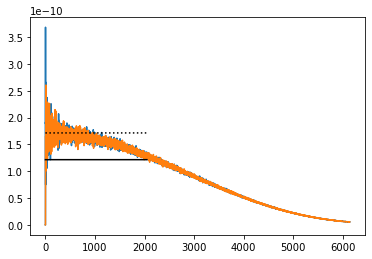

In [19]:
plt.plot(power_pol_2048[1])
plt.plot(power_pol_2048[2])
plt.plot([tau_ell_2048]*nside*2, c='black')
plt.plot([tau_ell]*nside*2,':', c='black')

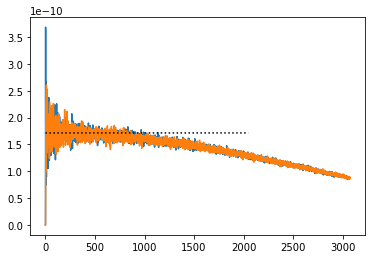

In [21]:
plt.plot(power_pol_2048_reduced[1])
plt.plot(power_pol_2048_reduced[2])
plt.plot([tau_ell]*nside*2,':', c='black')

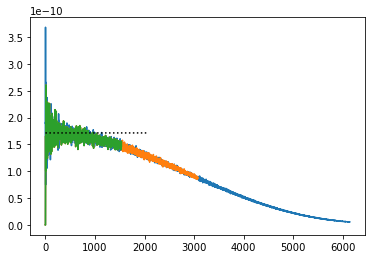

In [25]:
plt.plot(power_pol_2048[1])
plt.plot(power_pol_2048_reduced[2])
plt.plot(power_pol_2048_reduced2[2])
plt.plot([tau_ell]*nside*2,':', c='black')

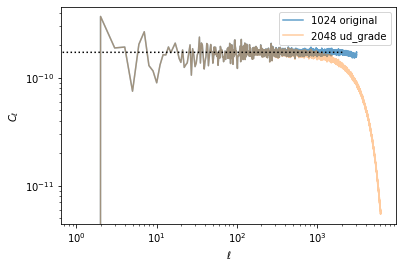

In [33]:
_ = plt.loglog(power_pol[1], label = '1024 original', alpha=0.7)
_ = plt.plot(power_pol_2048[1], label = '2048 ud_grade', alpha=0.4)
_ = plt.plot([tau_ell]*nside*2, ':', c='black')
_ = plt.ylabel(r'$C_\ell$'), plt.xlabel(r'$\ell$'), plt.legend()

# Should check that tau is transforming correctly

# Can also test that this framework gives approx the same result for a single iteration when signal power and tau ell are of similar order

In [26]:
random_T_field_2048_variance = hp.ud_grade(np.array([random_T_field[:hp.nside2npix(nside)]*0.,
                                            random_T_field[:hp.nside2npix(nside)],
                                            random_T_field[hp.nside2npix(nside):]]),
                                  2048, power=2)